In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("C:/Users/suraj/Desktop/ExcelR/Assignment 14 decision tree/Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data1=data.rename({'Taxable.Income':'Taxable_income', 'Marital.Status':'Maritial_status','Work.Experience':'Work_experience'}, axis=1)

In [9]:
data1

,Undergrad,Maritial_status,Taxable_income,City.Population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
data1['status']= ['Risky' if i<=30000 else 'good' for i in data1.Taxable_income]

In [11]:
data1

,Undergrad,Maritial_status,Taxable_income,City.Population,Work_experience,Urban,status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [12]:
data1["status"].value_counts()

good     476
Risky    124
Name: status, dtype: int64

In [13]:
data2=data1.drop('City.Population', axis=1)

In [14]:
data2

,Undergrad,Maritial_status,Taxable_income,Work_experience,Urban,status
0,NO,Single,68833,10,YES,good
1,YES,Divorced,33700,18,YES,good
2,NO,Married,36925,30,YES,good
3,YES,Single,50190,15,YES,good
4,NO,Married,81002,28,NO,good
...,...,...,...,...,...,...
595,YES,Divorced,76340,7,YES,good
596,YES,Divorced,69967,2,YES,good
597,NO,Divorced,47334,0,YES,good
598,YES,Married,98592,17,NO,good


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report 
from sklearn import preprocessing

In [16]:
label_encoder = preprocessing.LabelEncoder()
data2['Undergrad']=label_encoder.fit_transform(data2['Undergrad'])

In [17]:
label_encoder = preprocessing.LabelEncoder()
data2['Maritial_status']=label_encoder.fit_transform(data2['Maritial_status'])

In [18]:
label_encoder = preprocessing.LabelEncoder()
data2['Urban']=label_encoder.fit_transform(data2['Urban'])

In [19]:
label_encoder = preprocessing.LabelEncoder()
data2['status']=label_encoder.fit_transform(data2['status'])

In [20]:
data2

,Undergrad,Maritial_status,Taxable_income,Work_experience,Urban,status
0,0,2,68833,10,1,1
1,1,0,33700,18,1,1
2,0,1,36925,30,1,1
3,1,2,50190,15,1,1
4,0,1,81002,28,0,1
...,...,...,...,...,...,...
595,1,0,76340,7,1,1
596,1,0,69967,2,1,1
597,0,0,47334,0,1,1
598,1,1,98592,17,0,1


In [21]:
x=data2.iloc[:,0:5]
y=data2['status']

In [22]:
x

,Undergrad,Maritial_status,Taxable_income,Work_experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
...,...,...,...,...,...
595,1,0,76340,7,1
596,1,0,69967,2,1
597,0,0,47334,0,1
598,1,1,98592,17,0


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: status, Length: 600, dtype: int32

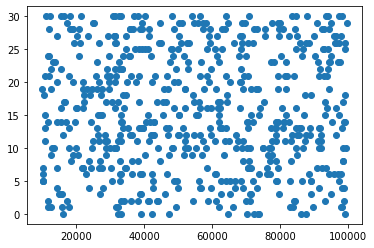

In [25]:
plt.scatter(data2['Taxable_income'],data2['Work_experience'])

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable_income', ylabel='Density'>

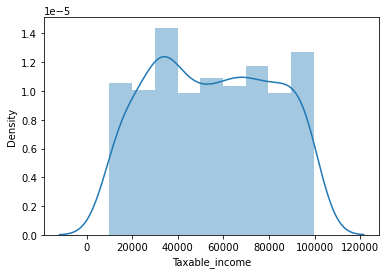

In [27]:
sns.distplot(data2['Taxable_income'])

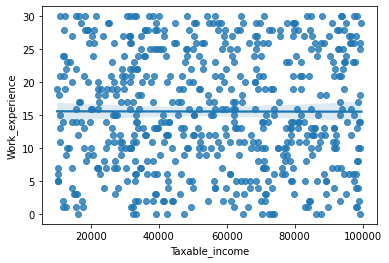

In [28]:
sns.regplot(x="Taxable_income", y="Work_experience", data=data2);

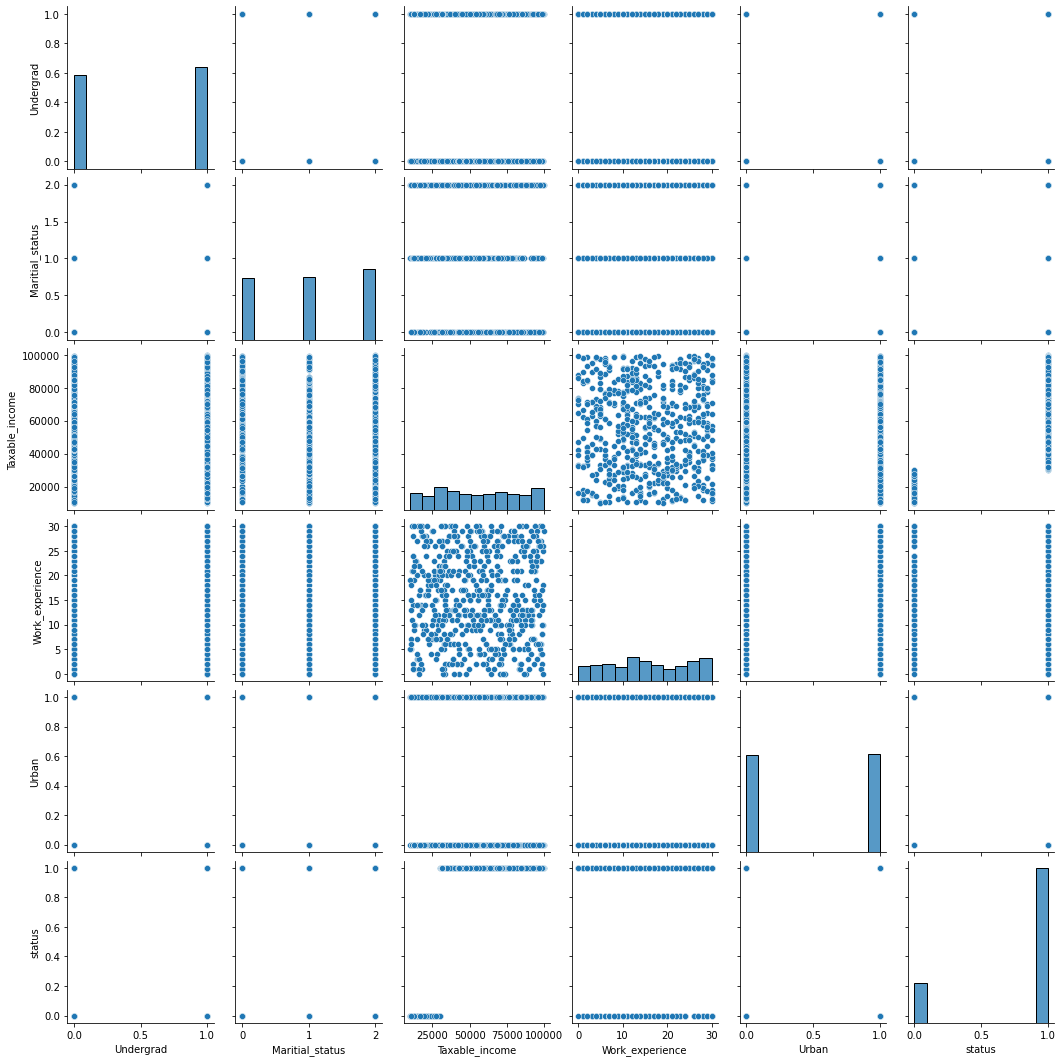

In [29]:
sns.pairplot(data2)

In [30]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [31]:
x_train

,Undergrad,Maritial_status,Taxable_income,Work_experience,Urban
118,0,0,29944,10,0
362,1,0,16320,17,1
55,1,2,19925,16,1
90,0,0,77634,29,0
390,1,2,64437,17,0
...,...,...,...,...,...
277,0,0,63710,11,0
9,1,0,98152,4,1
359,1,2,33215,11,0
192,1,1,48313,10,1


In [32]:
y_train

118    0
362    0
55     0
90     1
390    1
      ..
277    1
9      1
359    1
192    1
559    1
Name: status, Length: 480, dtype: int32

In [33]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.75, 'X[2] <= 30055.5\nentropy = 0.734\nsamples = 480\nvalue = [99, 381]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 381\nvalue = [0, 381]')]

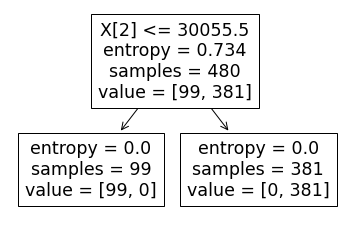

In [34]:
tree.plot_tree(model)

In [35]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    95
0    25
dtype: int64

In [36]:
y_test

434    0
122    0
224    1
479    1
205    0
      ..
144    1
386    1
437    0
313    1
471    0
Name: status, Length: 120, dtype: int32

In [37]:
pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [38]:
pd.crosstab(y_test,pred)

col_0,0,1
status,,
0,25,0
1,0,95


In [39]:
np.mean(pred==y_test)

1.0

In [40]:
#prediction 
new_data=pd.DataFrame({'Undergrad':0,'Maritial_status':0,'Taxable_income':37888,'Work_experience':5,'Urban':1},index=[0])
new_data

,Undergrad,Maritial_status,Taxable_income,Work_experience,Urban
0,0,0,37888,5,1


In [41]:
model.predict(new_data)

array([1])

Building Decision Tree Classifier (CART) using Gini Criteria

In [43]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [45]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

1.0

Decision Tree Regression Example

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
label_encoder = preprocessing.LabelEncoder()
data2['status']= label_encoder.fit_transform(data2['status'])

In [55]:
array = data2.values
X = array[:,0:5]
y = array[:,5]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [59]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
#Find the accuracy
model.score(X_test,y_test)

1.0